In [1]:
from __future__ import print_function, division
import os, bz2, json, time, sys, csv
from datetime import timedelta, datetime

import math
import collections
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats

from matplotlib import pyplot as plt
from tqdm import tqdm

from util_read_Copy import engage_read, read_vids, engage_tweets_read, merge_engage_tweets, engage_metadata, compute_period_daily

In [2]:
# file_vids_filter_all = "/home/users/u6314203/pyProject/hip-popularity/data/engage16/filtered/vids_filter_all.csv" 
# engage_dataset_base = "/localdata/u6314203/dataset_engage16/tweeted_videos" 
# tweets_dataset_base = "/localdata/u6314203/dataset_tweets_engage/dataset_tweets_fixTZ"

file_vids_filter_all = "C:/Users/u6314203/pyProjects/hip-popularity/data/engage16/filtered/vids_filter_all.csv"
engage_dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos"
tweets_dataset_base = "G:/MLCV dataset/engagement'16/tweets_dataset_fixTZ"

categories_eligible = ["autos", "comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

In [3]:
# vids from all category
vids_filter_all = read_vids(file_vids_filter_all)

dataset = dict()
# engage_metadata = dict() 
for category in categories_eligible[:]:    
    tweets_dataset = engage_tweets_read(tweets_dataset_base, category)
    dataset.update(tweets_dataset) 
    
print(f"Total size: {len(dataset)}")

Vids(filtered) in each category:
autos:25712; comedy:31741; education:41191; entertainment:180128; film:43101; gaming:222236; howto:61027; music:118094; news:38249; people:222658; science:32278; sports:39649; travel:13112
Tweets autos size: 25597
Tweets comedy size: 31678
Tweets education size: 41005
Tweets entertainment size: 179517
Tweets film size: 42954
Tweets gaming size: 221470
Tweets howto size: 60796
Tweets music size: 117764
Tweets news size: 38082
Tweets people size: 221975
Tweets science size: 32148
Tweets sports size: 39537
Tweets travel size: 13043
Total size: 1065566


In [4]:
vids = []
tweetsLengths = []

for vid, vals in dataset.items():
    vids.append(vid)
    tweetsLengths.append(len(vals['tweets']))

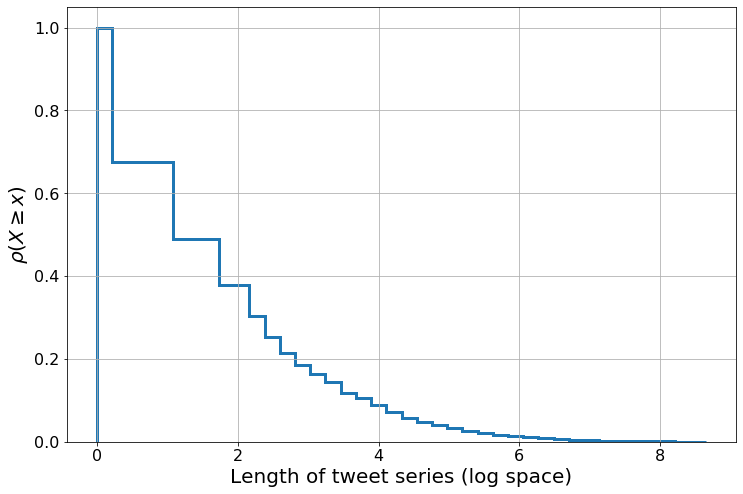

In [19]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
bins = 40
ccdf = np.log2(np.array(tweetsLengths))
ax.hist(ccdf, bins=bins, density=True, histtype='step', cumulative=-1, linewidth=3)

ax.grid(True)
ax.set_xlabel('Length of tweet series (log space)', fontsize=20)
ax.set_ylabel(r'$\rho (X \geq x)$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
fig.savefig("foo.pdf", bbox_inches='tight')